In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('housing')

In [3]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 5000, hidden_layers = [30, 30, 30], learning_rate = 0.02, exp_decay = .999)

initial loss:  751.9530639648438
nllk loss:  tensor(747.7012, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4173, grad_fn=<AddBackward0>)
nllk loss:  tensor(16.4009, grad_fn=<MeanBackward0>) kernel loss: tensor(273.8536, grad_fn=<AddBackward0>)
nllk loss:  tensor(296.9529, grad_fn=<MeanBackward0>) kernel loss: tensor(33.5707, grad_fn=<AddBackward0>)
nllk loss:  tensor(10.6840, grad_fn=<MeanBackward0>) kernel loss: tensor(85.8267, grad_fn=<AddBackward0>)
nllk loss:  tensor(17.6758, grad_fn=<MeanBackward0>) kernel loss: tensor(121.1766, grad_fn=<AddBackward0>)
nllk loss:  tensor(30.6052, grad_fn=<MeanBackward0>) kernel loss: tensor(34.0248, grad_fn=<AddBackward0>)
nllk loss:  tensor(12.4866, grad_fn=<MeanBackward0>) kernel loss: tensor(17.8580, grad_fn=<AddBackward0>)
nllk loss:  tensor(15.0805, grad_fn=<MeanBackward0>) kernel loss: tensor(35.4547, grad_fn=<AddBackward0>)
nllk loss:  tensor(7.2753, grad_fn=<MeanBackward0>) kernel loss: tensor(34.4120, grad_fn=<AddBackward0>)
nllk loss: 

nllk loss:  tensor(5.0925, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4753, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1070, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3241, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0511, grad_fn=<MeanBackward0>) kernel loss: tensor(2.3921, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1651, grad_fn=<MeanBackward0>) kernel loss: tensor(1.2178, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.3356, grad_fn=<MeanBackward0>) kernel loss: tensor(4.2966, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1223, grad_fn=<MeanBackward0>) kernel loss: tensor(2.4464, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.4383, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8350, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0025, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3337, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1278, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3226, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2978, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.0341, grad_fn=<MeanBackward0>) kernel loss: tensor(1.6438, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1598, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3384, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0364, grad_fn=<MeanBackward0>) kernel loss: tensor(1.7255, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.4231, grad_fn=<MeanBackward0>) kernel loss: tensor(1.8061, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1238, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1827, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0754, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1445, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0538, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6816, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0663, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6689, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0978, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3458, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0565, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.2013, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5882, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1730, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2504, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1408, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4126, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0496, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5349, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0536, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1855, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0181, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2683, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0496, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5440, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0536, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9116, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1030, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2781, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0794, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.0478, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5923, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1803, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3081, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1628, grad_fn=<MeanBackward0>) kernel loss: tensor(0.9213, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0763, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5193, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0499, grad_fn=<MeanBackward0>) kernel loss: tensor(1.3203, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0450, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5468, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0868, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4131, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0823, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8171, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0756, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4284, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0263, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.1783, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5026, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1522, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2548, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1041, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1684, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1369, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2815, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1532, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1819, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1208, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2580, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0961, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5768, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2189, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5711, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1252, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2929, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0798, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.1286, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4053, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2387, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3263, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1924, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6582, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1633, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4640, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1901, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4814, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2229, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6896, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2280, grad_fn=<MeanBackward0>) kernel loss: tensor(0.7536, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1916, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1129, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1698, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1477, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1691, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.1914, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1645, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1689, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2969, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1951, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1255, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1956, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5544, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2002, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2928, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1740, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5594, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1671, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2543, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1335, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4550, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1852, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1765, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1956, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.2294, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2261, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1987, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1244, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2126, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0448, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2072, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2396, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2356, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1565, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1836, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1925, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1424, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1415, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1616, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5263, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1503, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5387, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1076, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.1433, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1318, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2075, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1610, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1823, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1991, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1843, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1859, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1991, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2201, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2028, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1749, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2120, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1010, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2054, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0166, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.2032, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0757, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1849, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.1439, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1860, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1338, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0375, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1567, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1215, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1257, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2846, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1808, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2115, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1578, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2173, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1990, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2051, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1919, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1158, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1763, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1831, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1629, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.1719, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0325, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1360, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1392, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1234, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0573, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1374, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2047, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1101, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1728, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1054, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1730, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1652, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0821, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1354, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1636, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.1222, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2336, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0962, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(5.0700, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0482, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0558, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0253, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0517, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1553, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0672, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1045, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0816, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0496, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0765, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1471, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0903, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1426, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0872, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2162, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0554, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0585, grad_fn=<AddBackward0>)
nllk loss:  tensor(5.0456, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.9584, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2092, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9867, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0437, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9705, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0494, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9766, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3640, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9753, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0227, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9937, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0791, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9799, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4232, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9884, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2317, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9712, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0834, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9278, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.9296, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0672, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9181, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1933, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9139, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1627, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9631, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1748, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9198, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0991, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8975, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0657, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8950, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0448, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8887, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0501, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8706, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4558, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.9327, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.7524, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1528, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.7838, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4231, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8516, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1399, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8102, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1202, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.7944, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1350, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8103, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3529, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8123, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1877, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8207, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2143, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.8379, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5083, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.7754, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.6813, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1838, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6467, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0664, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6548, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1906, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6601, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1785, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6518, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3471, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6936, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0625, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6729, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1975, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6843, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1194, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6610, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1223, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.6581, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.5082, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1381, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4812, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0519, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4802, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0983, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4741, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1365, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4738, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1259, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4854, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0492, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4649, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1707, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4744, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2970, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4427, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2455, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.5044, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.4189, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1318, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4057, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1376, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.3885, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1489, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.3594, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0263, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.3473, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1417, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.3434, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0811, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4085, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1825, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.3766, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1519, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.4003, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0704, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.3677, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.2519, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2183, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2149, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4288, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2316, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2827, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2293, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2634, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2264, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4099, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2057, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0861, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.1984, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0355, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.1921, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2808, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.2012, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0409, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.1898, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(4.0725, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4277, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.1125, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0492, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0973, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2291, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0699, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2425, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.1081, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0036, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0773, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0647, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1110, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0367, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4529, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0447, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5758, grad_fn=<AddBackward0>)
nllk loss:  tensor(4.0507, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(3.9074, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1615, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.9049, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2431, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.9021, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2386, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8770, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0517, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8936, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1238, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8747, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1427, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8900, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1953, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8918, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2696, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8999, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2174, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.9039, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.8249, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2638, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7798, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0630, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8125, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1857, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.8125, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1331, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7997, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3069, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7940, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1184, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7800, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1093, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7782, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2894, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7790, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4106, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7741, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.6916, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5379, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.6824, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1874, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7185, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2813, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7010, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3769, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.6694, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5659, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.6920, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5942, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7435, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1095, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0632, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.7007, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2327, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.6853, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.5633, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2512, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5537, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5356, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5842, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0023, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5669, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1448, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5592, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1235, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5458, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1269, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5556, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1476, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5499, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2535, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5497, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0828, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.5445, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.4149, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1920, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4449, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4439, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4252, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4520, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4718, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4347, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2541, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4334, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1523, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4515, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1486, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4376, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3678, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4413, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2133, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.4773, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(3.3798, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0905, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3706, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0626, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3589, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4299, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3614, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1766, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3409, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4714, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3614, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0704, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3464, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3161, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3424, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2526, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3738, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3247, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.3989, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.2974, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1288, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2683, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0584, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2558, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0311, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2525, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1329, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2445, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2376, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0054, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2316, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0809, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2507, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4036, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2271, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1991, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.2474, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(3.1912, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2570, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1811, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4552, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1787, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2030, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1778, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2036, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1756, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2661, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1728, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1893, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1735, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0386, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1824, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2005, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1865, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1798, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1689, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.1189, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2218, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1178, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1703, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1076, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1040, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1040, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1000, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1083, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2779, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1172, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1769, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1323, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0471, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1187, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1452, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1226, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0618, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1194, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.0936, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0862, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0624, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0864, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3880, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1370, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2091, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1119, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1478, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1032, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1359, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1539, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3830, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1201, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1522, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1113, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3100, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1060, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(3.0741, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1118, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1010, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0815, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0868, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0782, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0843, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0847, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0818, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0986, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0921, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2582, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0955, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3160, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.1028, grad_fn=<MeanBackward0>) kernel loss: tensor(1.1204, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0930, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0727, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0868, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.0644, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1216, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0577, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0604, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0578, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2830, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0552, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2149, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0565, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1264, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0537, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1685, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0493, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2308, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0484, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3614, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0563, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0688, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0448, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.0037, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3235, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0067, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3128, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0046, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0379, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0049, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6559, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0281, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0985, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0243, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3576, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0252, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2470, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0227, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1912, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0224, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0190, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0213, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(3.0056, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1796, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0077, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0029, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0332, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0036, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0234, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9994, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0462, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9957, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0789, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9938, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3831, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0059, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1064, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9962, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3153, grad_fn=<AddBackward0>)
nllk loss:  tensor(3.0015, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(3.0005, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1471, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9943, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1398, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9954, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3133, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9990, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3943, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9997, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0112, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9956, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0651, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9946, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1517, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9938, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0097, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9977, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9942, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(2.9607, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3612, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9622, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1408, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9668, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1335, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9636, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1023, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9645, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4492, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9604, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4210, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9678, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0140, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9648, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1458, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9678, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0886, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9678, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.9306, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4136, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9338, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1365, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9333, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1123, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9329, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0853, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9300, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1727, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9311, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1026, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9342, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0360, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9316, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4340, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9355, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2750, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9348, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.9264, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0365, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9242, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2230, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9243, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4007, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9255, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1764, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9237, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9223, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3674, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9420, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1653, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9379, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2450, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9328, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3296, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9414, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(2.9178, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1213, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9157, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2502, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9136, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3679, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9218, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4549, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9158, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2339, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9147, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2251, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9152, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0261, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9135, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2625, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9132, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1172, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.9135, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.8927, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0581, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8921, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0183, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8914, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2068, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8959, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0220, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8919, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4370, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8919, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3309, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8920, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1097, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8915, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4403, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8918, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1720, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8916, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.8997, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0428, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8972, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0369, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8956, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1229, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8954, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0554, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8940, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8930, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1028, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8933, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0446, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8919, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0093, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8907, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0338, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8897, grad_fn=<MeanBackward0>) kernel loss: ten

nllk loss:  tensor(2.8943, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0067, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8948, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2804, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8954, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4195, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8965, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1176, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8948, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1787, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8964, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0087, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8968, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0706, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8967, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3281, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8988, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1524, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8969, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.8876, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1273, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8890, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1987, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8888, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0987, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8871, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2514, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8876, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1615, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8872, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1086, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8894, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1858, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8905, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3269, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8889, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1191, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8885, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.8744, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0730, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8740, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1846, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8742, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1787, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8741, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0609, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8743, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0808, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8764, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0948, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8759, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0822, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8763, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1407, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8760, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1752, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8771, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.8731, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0189, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8730, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2595, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8732, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0717, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8722, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1131, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8734, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0875, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8736, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1291, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8729, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2788, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8753, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0152, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8752, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1288, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8744, grad_fn=<MeanBackward0>) kernel loss:

nllk loss:  tensor(2.8783, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4878, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8770, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0189, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8750, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0961, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8758, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4201, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8787, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2475, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8746, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1050, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8753, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0162, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8745, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0524, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8735, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1886, grad_fn=<AddBackward0>)
nllk loss:  tensor(2.8752, grad_fn=<MeanBackward0>) kernel loss:

End2end test MAPE:  0.13078105
End2end test RMSE:  4.513759
End2end test NLLK:  4.0757017
End2end test CRPS:  tensor(2.1840)


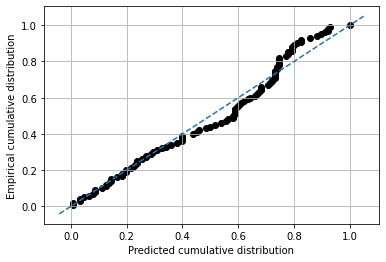

End2end test calibration error when step size is 0.001:  1.9970925925925933
End2end test calibration error when step size is 0.01:  0.20105442176870755
End2end test calibration error when step size is 0.1:  0.021227009322247435


In [4]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.79it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.66it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.24it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           2.880
  RMSE          4.514
  MDAE          1.797
  MARPD         13.243
  R2            0.779
  Correlation   0.887
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.050
  Mean-absolute Calibration Error       0.040
  Miscalibration Area                   0.040
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.151
     Group Size: 0.56 -- Calibration Error: 0.075
     Group Size: 1.00 -- Calibration Error: 0.040
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.191
     Group Size: 0.56 -- Calibration Error: 0.085
     Group Size: 1.00 -- Calibration Error: 0.050
===============

Lims is None. Setting lims now:
min_max_true: (7.0, 50.0)
min_max_pred: (8.845348, 48.441334)
lims: (7.0, 50.0)
lims_ext: (2.7, 54.3)


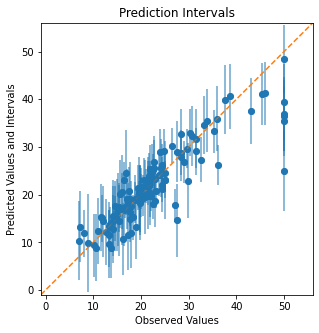

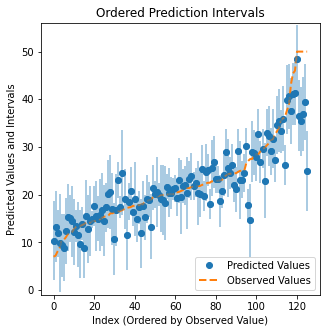

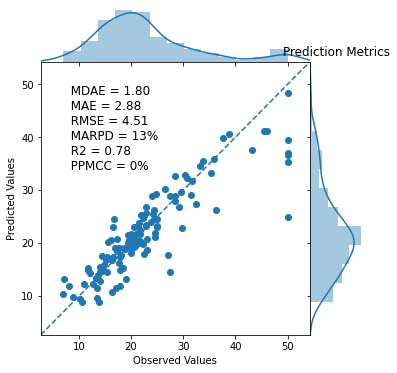

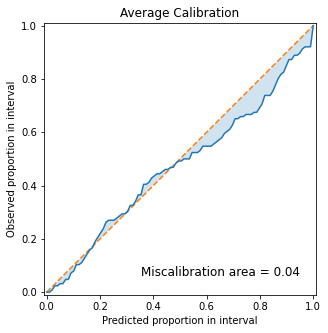

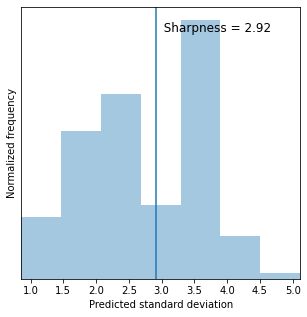

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))